In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
from scipy.interpolate import interp1d
from redshift_fit_lib import *

In [33]:
loaddir = '/Users/thepoetoftwilight/Documents/CUBS/1D_Extractions_updated/'

In [34]:
spec_1d_fits_1 = fits.open(loaddir + 'GD711/gal17_1dspec.fits')

wav0_1 = spec_1d_fits_1[0].header['CRVAL1']
delta_wav_1 = spec_1d_fits_1[0].header['CDELT1']

flux_1 = spec_1d_fits_1[0].data[4,:]
err_1 = spec_1d_fits_1[0].data[5,:]

wav_1 = np.arange(wav0_1, wav0_1+len(flux_1)*delta_wav_1, delta_wav_1)

In [35]:
#spec_1d_fits_1[0].header

In [36]:
#plt.plot(wav_1, spec_1d_fits_1[0].data[3,:])

In [37]:
spec_1d_fits_2 = fits.open(loaddir + 'GD712/gal5_1dspec.fits')

wav0_2 = spec_1d_fits_2[0].header['CRVAL1']
delta_wav_2 = spec_1d_fits_2[0].header['CDELT1']

flux_2 = spec_1d_fits_2[0].data[4,:]
err_2 = spec_1d_fits_2[0].data[5,:]

wav_2 = np.arange(wav0_2, wav0_2+len(flux_2)*delta_wav_2, delta_wav_2)

In [38]:
#plt.plot(wav_2, spec_1d_fits_2[0].data[3,:])

Text(0, 0.5, 'Counts (flat-fielded)')

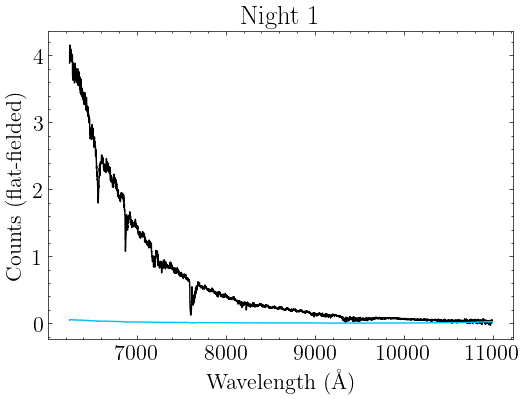

In [50]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.step(wav_1, flux_1/wav_1, where='mid')
ax.step(wav_1, err_1/wav_1, where='mid')

ax.set_title('Night 1')

ax.set_xlabel('Wavelength (Å)')
ax.set_ylabel('Counts (flat-fielded)')

Text(0, 0.5, 'Counts (flat-fielded)')

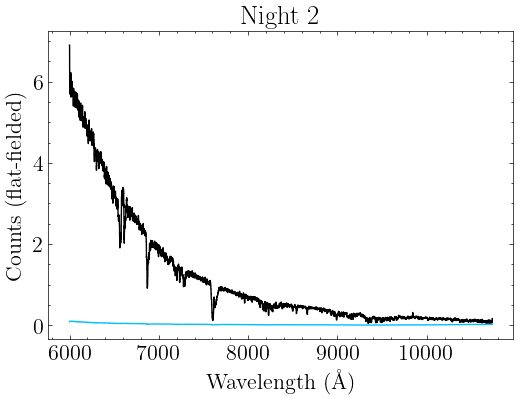

In [51]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.step(wav_2, flux_2/wav_2, where='mid')
ax.step(wav_2, err_2/wav_2, where='mid')

ax.set_title('Night 2')

ax.set_xlabel('Wavelength (Å)')
ax.set_ylabel('Counts (flat-fielded)')

Now, we need a standard file

In [52]:
spec_ref_fits = fits.open(loaddir + 'GD711/gd71_stiswfcnic_004.fits')

In [53]:
#spec_ref_fits[1].header

In [54]:
spec_ref_df = pd.DataFrame(spec_ref_fits[1].data)

In [55]:
#spec_ref_df

In [56]:
wav_ref = spec_ref_df['WAVELENGTH']
flux_ref = spec_ref_df['FLUX']
err_ref = spec_ref_df['STATERROR']

In [57]:
idx = (wav_ref>=wav_1[0])&(wav_ref<=wav_1[-1])
#idx = (wav_ref>=3000)&(wav_ref<=wav[-1])

Text(0, 0.5, '$F_\\lambda$ (erg/cm${}^2$/s/Å)')

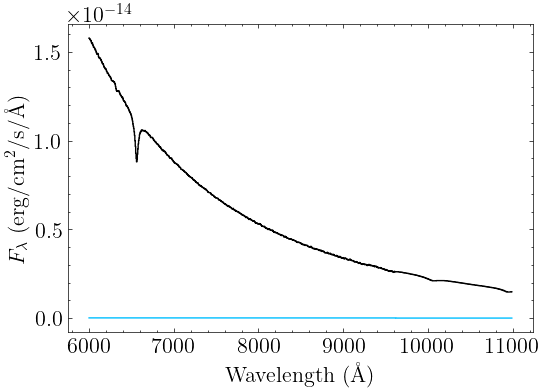

In [58]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.step(wav_ref[idx], flux_ref[idx], where='mid')
ax.step(wav_ref[idx], err_ref[idx], where='mid')

ax.set_xlabel('Wavelength (Å)')
ax.set_ylabel(r'$F_\lambda$ (erg/cm${}^2$/s/Å)')

In [59]:
flux_ref_interp = np.interp(wav_1, np.array(wav_ref[idx]), np.array(flux_ref[idx]))

Alternate standard file

In [60]:
spec_ref_alt_arr = np.loadtxt(loaddir+'GD711/fgd71.dat.txt')

In [61]:
wav_ref_alt = spec_ref_alt_arr[:,0]
flux_ref_alt = 1e-16*spec_ref_alt_arr[:,1]

In [62]:
idx_alt = (wav_ref_alt>=wav_1[0])&(wav_ref_alt<=wav_1[-1])
#idx = (wav_ref>=3000)&(wav_ref<=wav[-1])

Text(0, 0.5, '$F_\\lambda$ (erg/cm${}^2$/s/Å)')

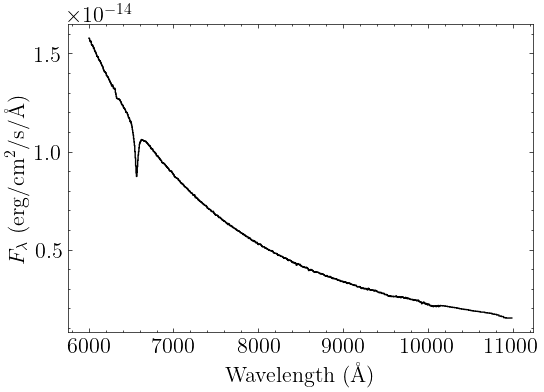

In [63]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.step(wav_ref_alt[idx_alt], flux_ref_alt[idx_alt], where='mid')

ax.set_xlabel('Wavelength (Å)')
ax.set_ylabel(r'$F_\lambda$ (erg/cm${}^2$/s/Å)')

In [64]:
flux_ref_alt_interp = np.interp(wav_1, np.array(wav_ref_alt[idx_alt]), np.array(flux_ref_alt[idx_alt]))

Compare fluxes

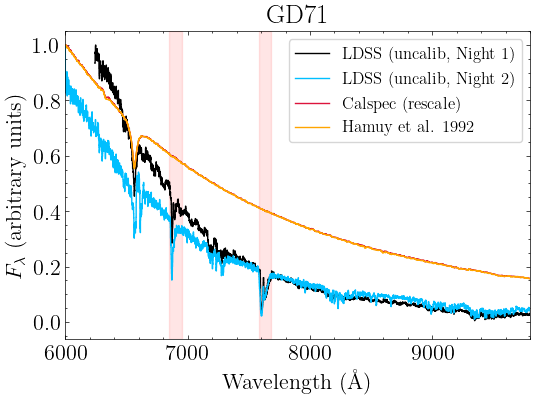

In [72]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.step(wav_1, flux_1/np.nanmax(flux_1), where='mid', label='LDSS (uncalib, Night 1)')
ax.step(wav_2, flux_2/np.nanmax(flux_2), where='mid', label='LDSS (uncalib, Night 2)')

#ax.step(wav, np.log10(err/wav), where='mid')
ax.step(wav_1, flux_ref_interp/np.max(flux_ref_interp), 
        where='mid', label='Calspec (rescale)')
ax.step(wav_1, flux_ref_alt_interp/np.max(flux_ref_alt_interp), 
        where='mid', label='Hamuy et al. 1992')

ax.axvspan(xmin=6850, xmax=6950, color='red', alpha=.1)
ax.axvspan(xmin=7580, xmax=7680, color='red', alpha=.1)

ax.set_title('GD71')
ax.set_xlabel('Wavelength (Å)')
ax.set_ylabel(r'$F_\lambda$ (arbitrary units)')

ax.set_xlim(6000,9800)
ax.legend()

Night 1 mask image did not have filter on, while night 2 mask image did. This implies that the orientation will be worse on the blue end for night 2. Also night 2 has worse seeing at a similar airmass than night 1. This explains the dearth of blue photons in night 2 compared to night 1. 

Look at EG274.